In [3]:
import pandas as pd
import csv
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
import re
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## About the Dataset:


---


Our dataset consists of 22 nodes, 27 edges with ECO2 as target variables and INT, KINK as context variables. We perform our experiments across three different domains.   
**Domain Changes:**
 
In domain 2, the probability distribution of the context variable INT has been changed slightly as compared to domain 1 whereas in domain 3, the probability distributions of both the context variables, INT and KINK are changed significantly as compared to domain 1.

Text(0.5, 1.0, 'Underlying Graph structure for data used')

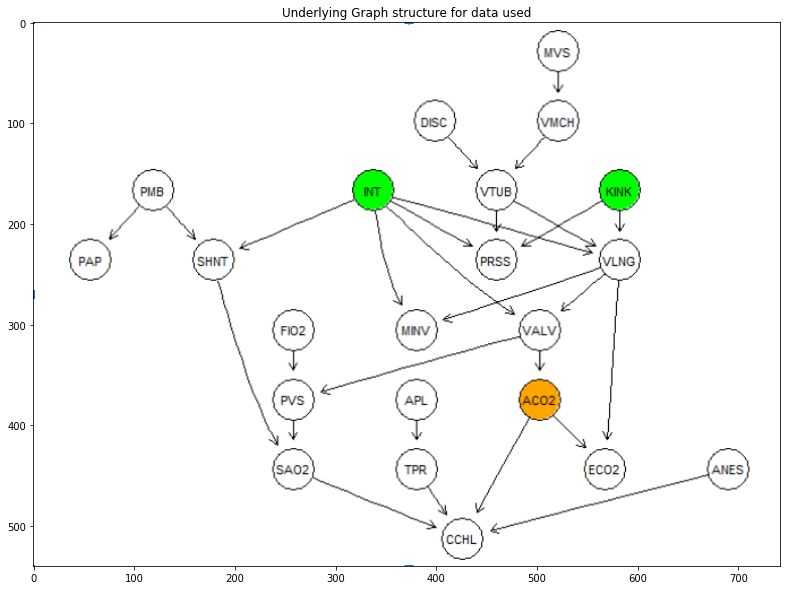

In [7]:
# importing pyplot and image from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
  
plt.figure(figsize=(20,10))   
# reading png image file
im = img.imread('/content/drive/MyDrive/tl graph.png')
  
# show image
plt.imshow(im)
plt.title("Underlying Graph structure for data used")

## Methodologies:


---


In the section below on the above mentioned dataset we perform experiments, mse_data and mae_data are the dataframes that document the respective mse and mae for the methods across multiple domains.

In [8]:
mse_data = pd.DataFrame(columns =["Methods", "Domain 1", "Domain 2", "Domain 3"])
mae_data = pd.DataFrame(columns =["Methods", "Domain 1", "Domain 2", "Domain 3"])

### Baseline: RandomForest

In [10]:
# ECO2 target
# Data 1 -> TRAINING DATA
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_train1.csv")
X_train,X_test,y_train,y_test = train_test_split(df.drop(['ECO2'],axis = 1), df['ECO2'],test_size=0.2)

# RANDOM FOREST Regressor

regressor = RandomForestRegressor(n_estimators = 1000,random_state=49)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom1_mae =  round(np.mean(errors), 2)
dom1_mse =  round(mse, 2)

# # Data 2 -> SOFT PERTURBATION ON INT
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_softINT2.csv")

X_test = df.drop(['ECO2'],axis = 1)
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom2_mae =  round(np.mean(errors), 2)
dom2_mse =  round(mse, 2)


# # Data 3 -> HARD PERTURBATION ON INT & KINK
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_hardIntKink2.csv")

X_test = df.drop(['ECO2'],axis = 1)
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom3_mae =  round(np.mean(errors), 2)
dom3_mse =  round(mse, 2)

method = "Baseline: RandomForest"
mse_data = mse_data.append({'Methods' : method, "Domain 1": dom1_mse, "Domain 2":dom2_mse, "Domain 3":dom3_mse},  ignore_index=True)
mae_data = mae_data.append({'Methods' : method, "Domain 1": dom1_mae, "Domain 2":dom2_mae, "Domain 3":dom3_mae}, ignore_index=True)

### SCTL

In [12]:
# ECO2 target


# Data 1 -> TRAINING DATA
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_train1.csv")
X_train,X_test,y_train,y_test = train_test_split(df[['ACO2', 'VLNG']], df['ECO2'],test_size=0.2)

# RANDOM FOREST Regressor

regressor = RandomForestRegressor(n_estimators = 1000,random_state=49)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom1_mae =  round(np.mean(errors), 2)
dom1_mse =  round(mse, 2)


# Data 2 -> SOFT PERTURBATION ON INT
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_softINT2.csv")

X_test = df[['ACO2', 'VLNG']]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom2_mae =  round(np.mean(errors), 2)
dom2_mse =  round(mse, 2)

# Data 3 -> HARD PERTURBATION ON INT & KINK
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_hardIntKink2.csv")

X_test = df[['ACO2', 'VLNG']]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom3_mae =  round(np.mean(errors), 2)
dom3_mse =  round(mse, 2)


method = "SCTL"
mse_data = mse_data.append({'Methods' : method, "Domain 1": dom1_mse, "Domain 2":dom2_mse, "Domain 3":dom3_mse},  ignore_index=True)
mae_data = mae_data.append({'Methods' : method, "Domain 1": dom1_mae, "Domain 2":dom2_mae, "Domain 3":dom3_mae}, ignore_index=True)

### GSS

In [17]:
!pip install picos
import autograd.numpy as np_aut
import autograd

import numpy as np
import scipy as sc
from scipy import io
from scipy.spatial.distance import pdist, squareform
import sys
import time

from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from matplotlib import pyplot as pl
from matplotlib import rc
import matplotlib as mpl

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import KFold
import os

import pickle
import picos as pic
from cvxopt import matrix, solvers

def split_train_valid(x, y, n_ex, valid_split=0.1):
    n_ex_cum = np.append(0, np.cumsum(n_ex))
    n_ex_train, n_ex_valid = [], []
    train_x, train_y, valid_x, valid_y = [], [], [], []

    for i in range(len(n_ex)):
        n_train_task = int((1 - valid_split) * n_ex[i])
        train_x.append(x[n_ex_cum[i]:n_ex_cum[i] + n_train_task])
        train_y.append(y[n_ex_cum[i]:n_ex_cum[i] + n_train_task])

        valid_x.append(x[n_ex_cum[i] + n_train_task:n_ex_cum[i + 1]])
        valid_y.append(y[n_ex_cum[i] + n_train_task:n_ex_cum[i + 1]])
        
        n_ex_train.append(n_train_task)
        n_ex_valid.append(n_ex[i] - n_train_task)

    train_x = np.concatenate(train_x, 0)
    valid_x = np.concatenate(valid_x, 0)
    train_y = np.concatenate(train_y, 0)
    valid_y = np.concatenate(valid_y, 0)

    n_ex_train = np.array(n_ex_train)
    n_ex_valid = np.array(n_ex_valid)

    return train_x, train_y, valid_x, valid_y, n_ex_train, n_ex_valid



def np_getDistances(x,y):
    K = (x[:,:, np.newaxis] - y.T)
    return np.linalg.norm(K,axis = 1)

    
#Select top 11 predictors from Lasso
def lasso_alpha_search_synt(X,Y):

    exit_loop = False
    alpha_lasso = 0.2
    step = 0.02
    num_iters = 1000
    count = 0
    n = 11

    while(not exit_loop and count < num_iters):
            count = count + 1

            regr = linear_model.Lasso(alpha = alpha_lasso)
            regr.fit(X,Y.flatten())
            zeros =  np.where(np.abs(regr.coef_) < 0.00000000001)

            nonzeros = X.shape[1]-zeros[0].shape[0]

            if(nonzeros >= n and nonzeros<n+1):
                    exit_loop = True
            if nonzeros<n:
                    alpha_lasso -= step
            else:
                    step /= 2
                    alpha_lasso += step


    mask = np.ones(X.shape[1],dtype = bool)
    mask[zeros] = False
    genes = []
    index_mask = np.where(mask == True)[0]

    return mask



#Given a number of training tasks, the total number of examples and the number per task, return a boolean mask (for SMTL)
def mask_training_tasks(n_tasks,n_s,n_tot,n_pred):
    mask = np.zeros((n_tot,n_pred),dtype = bool)
    n_each = n_tot/n_tasks
    for t in range(n_tasks):
        mask[t*n_each:t*n_each+n_s,:] = True
    return mask


#-------------------------------------------------------------------------------
# Run and SDP to find a feasible solution when optimising (4)
#-----------------------------------------------------------------------------

def find_init_sol(Cov_ctr,s_size, n_size):

    shape = Cov_ctr.shape[0]
    sdp = pic.Problem()
    X = sdp.add_variable('X', (shape,shape), vtype='symmetric')
    Cov_ctr = pic.new_param('M', matrix(Cov_ctr))

    #Matrix has to be spd
    sdp.add_constraint(X>>0)
    for i in range(shape):
        for j in range(i+1):
            if i==shape-1 and j>=s_size and j<shape-1:
                continue
            else:
                sdp.add_constraint(X[i,j] == Cov_ctr[i,j])

    sdp.set_objective('min',0*sum(X))
    sol = sdp.solve(solver = 'cvxopt', verbose = False)
    X = np.array(X.value)

    return X
 
def find_init_sol_b(Cov_ctr, fix):

    shape = Cov_ctr.shape[0]
    sdp = pic.Problem()
    X = sdp.add_variable('X', (shape,shape), vtype='symmetric')
    Cov_ctr = pic.new_param('M', matrix(Cov_ctr))

    #Matrix has to be spd
    sdp.add_constraint(X>>0)

    for i in range(shape-fix, shape):
        for j in range(shape-fix, shape):
          sdp.add_constraint(X[i,j] == Cov_ctr[i,j])

    sdp.set_objective('min', 0*sum(X))
    sol = sdp.solve(solver = 'cvxopt', verbose = True)
    X = np.array(X.value)

    return X

#---------------------------------------------------------------------------
# Compute beta for the naive plug-in estimator
#---------------------------------------------------------------------------

def compute_beta_naive(X,X_l,Y_l,S,alpha,eps,numCauses, X_tr = 0, Y_tr = 0):

    ns_l = X.shape[0]
    ns_s = Y_l.size

    
    numEffects = X.shape[1]-numCauses
    numPredictors = X.shape[1]
    
    cov_x = 1./ns_l*np.dot(X.T,X)
    cov_xs = cov_x[0:numCauses,0:numCauses]
    
    cov_ys = np.dot(cov_xs,alpha)

    cov_yn = 1./ns_s*np.dot(X_l[:,numCauses:].T,Y_l)
    cov_xy = np.append(cov_ys, cov_yn)[:,np.newaxis]
    
    cy = np.dot(alpha[np.newaxis,:],
                np.dot(cov_xs,alpha[:,np.newaxis])) + eps**2
        
    cov_y = np.concatenate([cov_xy,cy]).T
        
    temp = np.append(cov_x,cov_xy.T,axis=0)
    cov = np.append(temp,cov_y.T,axis=1)

    cov_x = cov[0:-1,0:-1]
    cov_xy = cov[-1,0:-1][:,np.newaxis]

    beta_est =  np.dot(np.linalg.inv(cov_x),cov_xy)

    return beta_est

#--------------------------------------------------------------------
# Maximize (4) and return beta
#-------------------------------------------------------------------

def compute_beta_mtl(X,X_l,Y_l,S,alpha,eps,numCauses,X_tr = 0,
                     Y_tr = 0, opti_alpha = False,
                     true_cov = None):

    ns_l = X.shape[0]
    ns_s = Y_l.size
    
    numEffects = X.shape[1]-numCauses
    numPredictors = X.shape[1]

    if true_cov ==None:
        cov_x = np.cov(X.T)
    else:
        cov_x = true_cov[0:-1,0:-1]
        

    if numCauses == numPredictors:
        cov_xs = cov_x[0:numCauses,0:numCauses]
        cov_ys = np.dot(cov_xs,alpha)
        cov_xy = cov_ys[:,np.newaxis]
        cy = np.dot(alpha[np.newaxis,:],
                np.dot(cov_xs,alpha[:,np.newaxis])) + eps**2

        cov_y = np.concatenate([cov_xy,cy]).T
        temp = np.append(cov_x,cov_xy.T,axis=0)
        cov = np.append(temp,cov_y.T,axis=1)

        cov_x = cov[0:-1,0:-1]
        cov_xy = cov[-1,0:-1][:,np.newaxis]
        
        beta_est =  np.dot(np.linalg.inv(cov_x),cov_xy)
        return beta_est

    
    elif numCauses ==0:
        cov_xy = 1./ns_s*np.dot(X_l[:,numCauses:].T,Y_l)
        cov_yn = cov_xy
        cy = np.array([eps**2])[:,np.newaxis]
        
    else:
        cov_xs = cov_x[0:numCauses,0:numCauses]
        cov_ys = np.dot(cov_xs,alpha)
        cov_yn = 1./ns_s*np.dot(X_l[:,numCauses:].T,Y_l)

        cov_xy = np.append(cov_ys, cov_yn)[:,np.newaxis]
        cy = np.dot(alpha[np.newaxis,:],
                    np.dot(cov_xs,alpha[:,np.newaxis])) + eps**2

    
    cov_y = np.concatenate([cov_xy,cy]).T
    temp = np.append(cov_x,cov_xy.T,axis=0)
    x = cov_yn

    M = np.append(temp,cov_y.T,axis=1)
    
    def logl_chol(u):
        
        Mat = M

        Mat[-1,numCauses:-1] = u
        Mat[numCauses:-1,-1] = u.T
        
        try:
            M_inv = np_aut.linalg.inv(Mat)
            det = np_aut.linalg.det(M_inv)
            if np_aut.isnan(det) or det<0:
                log_det = -1e5
            else: log_det = np_aut.log(det)
            
            ret = np_aut.trace(np_aut.dot(M_inv,S)) - log_det
            
        except Exception:
            ret = 1e5
    
        return ret
    
        
    cov= find_init_sol(M,numCauses,numEffects)
    M[-1,numCauses:-1] = cov[-1,numCauses:-1]
    
    x_init = M[-1,numCauses:-1]
    tol= 1e-10
    res = sc.optimize.fmin(logl_chol,x_init,
                            xtol = tol,
                            ftol = tol,
                            maxiter = 1e5,
                            maxfun = 3e5,
                            disp = False)

    M[-1,numCauses:-1] = res
    M[numCauses:-1,-1] = res.T
    
    cov[-1,numCauses:-1] = M[-1,numCauses:-1]
    cov[numCauses:-1,-1] = M[numCauses:-1,-1]    
    cov_x = cov[0:-1,0:-1]
    cov_xy = cov[-1,0:-1][:,np.newaxis]

    beta_est =  np.dot(np.linalg.inv(cov_x),cov_xy)

    return beta_est


#----------------------------------------------------------------------------
#Return MTL coefficient for both the naive and the approach maximizing (4)
#----------------------------------------------------------------------------

def error_naive_beta(train_x, train_y,
                   X_lab,Y_lab,
                   X_ul,test_x,test_y,
                   subset,cov,n,p, alpha=np.zeros(1), eps=0,min_el = 0):

    if eps==0:
        train_x_all = np.append(train_x, X_lab, axis=0)
        train_y_all = np.append(train_y, Y_lab, axis=0)
        regr = linear_model.LinearRegression()
        regr.fit(train_x_all[:,subset],train_y_all)
        pred = regr.predict(train_x_all[:,subset])
        alpha = regr.coef_
        eps = np.std(train_y_all-pred)

    else:
        alpha = alpha
        eps = eps
    
    mask = np.ones(p, dtype = bool)

    mask[subset] = False

    s_size = subset.size

    X_lab_perm = np.concatenate([X_lab[:,subset],X_lab[:,mask]],axis=1)
    X_ul_perm = np.concatenate([X_ul[:,subset],X_ul[:,mask]],axis=1)

    cov = np.concatenate([X_lab_perm, Y_lab], axis=1)
    cov = 1./n*np.dot(cov.T,cov)
                             
    beta = compute_beta_naive(np.append(X_lab_perm, X_ul_perm,axis=0),
                            X_lab_perm,
                            Y_lab,
                            cov,
                            alpha.flatten(),
                            eps,
                            s_size,
                            train_x,
                            train_y)

    bs = beta[0:s_size].flatten()
    bn  = beta[s_size:].flatten()
    
    if min_el != 0:
        n = min_el

    pred_test = np.sum(bs*test_x[:,subset],axis=1) + np.sum(bn*test_x[:,mask],1)
    pred_test = pred_test[:,np.newaxis]
    
    mse_test =np.mean((pred_test-test_y)**2)
    if subset.size > 0 and subset.size<p:
        b = np.zeros(p)
        b[subset] = bs
        b[mask] = bn
    else:
        b = beta.flatten()

    return mse_test, b[:,np.newaxis]


def error_mle_beta(train_x, train_y,
                   X_lab,Y_lab,
                   X_ul,test_x,test_y,
                   subset,cov,n,p, alpha=np.zeros(1), eps=0,min_el = 0,
                   opti_alpha = False,
                   true_cov = None):

    if eps==0:
        train_x_all = np.append(train_x, X_lab, axis=0)
        train_y_all = np.append(train_y, Y_lab, axis=0)
        
        if subset.size > 0:
            regr = linear_model.LinearRegression()
            regr.fit(train_x_all[:,subset],train_y_all)
            pred = regr.predict(train_x_all[:,subset])
            alpha = regr.coef_.flatten()
            eps = np.std(train_y_all-pred)

        else:
            alpha = np.zeros(1)
            eps = np.std(train_y_all)

    else:
        alpha = alpha
        eps = eps

    mask = np.ones(p, dtype = bool)
    if subset.size>0:
        mask[subset] = False

    s_size = subset.size
    if s_size > 0:
        X_lab_perm = np.concatenate([X_lab[:,subset],X_lab[:,mask]],axis=1)
        X_ul_perm = np.concatenate([X_ul[:,subset],X_ul[:,mask]],axis=1)
    else:
        X_lab_perm = X_lab
        X_ul_perm = X_ul

    cov = np.concatenate([X_lab_perm, Y_lab], axis=1)
    cov = np.cov(cov.T)
    
    beta = compute_beta_mtl(np.append(X_lab_perm, X_ul_perm,axis=0),
                            X_lab_perm,
                            Y_lab,
                            cov,
                            alpha.flatten(),
                            eps,
                            s_size,
                            train_x,
                            train_y,
                            opti_alpha,
                            true_cov)

    bs = beta[0:s_size].flatten()
    bn  = beta[s_size:].flatten()
    
    #if min_el != 0:
        #n = min_el

    if subset.size>0:
        pred_test = np.sum(bs*test_x[:,subset],axis=1)+ np.sum(bn*test_x[:,mask],1)
    else: pred_test = np.sum(bn*test_x[:,mask],1)
    pred_test = pred_test[:,np.newaxis]
    
    mse_test =np.mean((pred_test-test_y)**2)

    if subset.size > 0 and subset.size<p:
        b = np.zeros(p)
        b[subset] = bs
        b[mask] = bn
    else:
        b = beta.flatten()

    return mse_test, b[:,np.newaxis]

    
def error_mle_beta_cv(train_x, train_y,
                   X_lab_all, Y_lab_all,
                   X_ul,
                   subset_list,cov,n,p, 
                   alpha=np.zeros(1), eps=0,min_el = 0,
                   opti_alpha = False,
                   true_cov = None):

    scores = []
    fold = 5

    kf = KFold(X_lab_all.shape[0], n_folds = fold)

    for subset in subset_list:
      scores_temp = []

      for train, test in kf:
        X_lab = X_lab_all[train]
        Y_lab = Y_lab_all[train]
        n = X_lab.shape[0]

        if eps==0:
            train_x_all = np.append(train_x, X_lab, axis=0)
            train_y_all = np.append(train_y, Y_lab, axis=0)
            
            if subset.size > 0:
                regr = linear_model.LinearRegression()
                regr.fit(train_x_all[:,subset],train_y_all)
                pred = regr.predict(train_x_all[:,subset])
                alpha = regr.coef_.flatten()
                eps = np.std(train_y_all-pred)

            else:
                alpha = np.zeros(1)
                eps = np.std(train_y_all)

        else:
            alpha = alpha
            eps = eps

        mask = np.ones(p, dtype = bool)
        if subset.size>0:
            mask[subset] = False

    
        s_size = subset.size
        if s_size > 0:
            X_lab_perm = np.concatenate([X_lab[:,subset],X_lab[:,mask]],axis=1)
            X_ul_perm = np.concatenate([X_ul[:,subset],X_ul[:,mask]],axis=1)
        else:
            X_lab_perm = X_lab
            X_ul_perm = X_ul

        cov = np.concatenate([X_lab_perm, Y_lab], axis=1)
        cov = np.cov(cov.T)
        
        beta = compute_beta_mtl(np.append(X_lab_perm, X_ul_perm,axis=0),
                                X_lab_perm,
                                Y_lab,
                                cov,
                                alpha.flatten(),
                                eps,
                                s_size,
                                train_x,
                                train_y,
                                opti_alpha,
                                true_cov)

        bs = beta[0:s_size].flatten()
        bn  = beta[s_size:].flatten()
        
        test_x, test_y = X_lab_all[test], Y_lab_all[test]

        if subset.size>0:
            pred_test = np.sum(bs*test_x[:,subset],axis=1)+ np.sum(bn*test_x[:,mask],1)
        else: pred_test = np.sum(bn*test_x[:,mask],1)
        pred_test = pred_test[:,np.newaxis]
        
        mse_test =np.mean((pred_test-test_y)**2)

        if subset.size > 0 and subset.size<p:
            b = np.zeros(p)
            b[subset] = bs
            b[mask] = bn
        else:
            b = beta.flatten()
        scores_temp.append(mse_test)
        eps = 0
      scores.append(np.mean(scores_temp))

    return subset_list[np.argmin(scores)]


def np_getDistances(x,y):
	K = (x[:,:, np.newaxis] - y.T)
	return np.linalg.norm(K,axis = 1)

def np_gaussian_kernel(x,y, beta=0.1):
    K = np_outer_substract(x,y)
    return np.exp( -beta * np.linalg.norm(K, axis=1))

def mat_hsic(X,nEx):

	nExCum = np.cumsum(nEx)
	domains = np.zeros((np.sum(nEx),np.sum(nEx)))
	currentIndex = 0

	for i in range(nEx.size):

		domains[currentIndex:nExCum[i], currentIndex:nExCum[i]] = np.ones((nEx[i], nEx[i]))
		currentIndex = nExCum[i]

	return domains

def numpy_GetKernelMat(X,sX):

	Kernel = (X[:,:, np.newaxis] - X.T).T
	Kernel = np.exp( -1./(2*sX) * np.linalg.norm(Kernel, axis=1))

	return Kernel

def numpy_HsicGammaTest(X,Y, sigmaX, sigmaY, DomKer = 0):

	n = X.T.shape[1]

	KernelX = numpy_GetKernelMat(X,sigmaX)

	KernelY = DomKer

	coef = 1./n
	HSIC = coef**2*np.sum(KernelX*KernelY) + coef**4*np.sum(
                KernelX)*np.sum(KernelY) - 2*coef**3*np.sum(np.sum(KernelX,axis=1)*np.sum(KernelY, axis=1))
	
	#Get sums of Kernels
	KXsum = np.sum(KernelX)
	KYsum = np.sum(KernelY)

	#Get stats for gamma approx

	xMu = 1./(n*(n-1))*(KXsum - n)
	yMu = 1./(n*(n-1))*(KYsum - n)
	V1 = coef**2*np.sum(KernelX*KernelX) + coef**4*KXsum**2 - 2*coef**3*np.sum(np.sum(KernelX,axis=1)**2)
	V2 = coef**2*np.sum(KernelY*KernelY) + coef**4*KYsum**2 - 2*coef**3*np.sum(np.sum(KernelY,axis=1)**2)

	meanH0 = (1. + xMu*yMu - xMu - yMu)/n
	varH0 = 2.*(n-4)*(n-5)/(n*(n-1.)*(n-2.)*(n-3.))*V1*V2

	#Parameters of the Gamma
	a = meanH0**2/varH0
	b = n * varH0/meanH0

	return n*HSIC, a, b


def sigmoid(x):
	return 1./(1+np.exp(-x))

#--------------------------------------------------------
#Process residuals for computing a Levene test
#-------------------------------------------------------

def levene_pval(Residual,nEx, numR):
	
	prev = 0 
	n_ex_cum = np.cumsum(nEx)

	for j in range(numR):

		r1 = Residual[prev:n_ex_cum[j]]

		if j == 0:
			residTup = (r1,)

		else:
			residTup = residTup + (r1,)

		prev = n_ex_cum[j]

	return residTup


#----------------------------------------------------------------------------
# Utils for Dica
#--------------------------------------------------------------------------

def get_kernel_mat(x,y, sx2):
    K = (x[:,:, np.newaxis] - y.T)
    return np.exp(-1./(2*sx2)*np.linalg.norm(K,axis = 1)**2)

def get_kernel_mat_lin(x,y, sx2):
    K = (x[:,:, np.newaxis]*y.T)
    return np.sum(K,axis=1)

def np_getDistances(x,y):
	K = (x[:,:, np.newaxis] - y.T)
	return np.linalg.norm(K,axis = 1)


def get_color_dict():

  colors = {
    'pool' : 'red',
    'lasso' : 'red',
    'shat' : 'green',
    'sgreed' : 'green',
    'ssharp' : 'green',
    'strue' : 'blue',
    'cauid' : 'blue',
    'causharp': 'blue',
    'cauul' : 'blue',
    'mean' : 'black',
    'msda' : 'orange',
    'mtl' : 'orange',
    'dica' : 'orange',
    'dom' : 'k',
    'naive' : 'magenta'
  }

  markers = {
    'pool' : 'o',
    'lasso' : '^',
    'shat' : 'o',
    'sgreed' : '^',
    'strue' : '^',
    'ssharp' : 'd',
    'cauid' : 'd',
    'causharp' : 'h',
    'cauul' : '^',
    'mean' : 'o',
    'msda' : 'o',
    'mtl' : '^',
    'dica' : 'd',
    'dom' : 'o',
    'naive' : 'o'
  }

  legends = {
              'pool' : r'$\beta^{CS}$',
              'lasso' : r'$\beta^{CS(\hat S Lasso)}$',
              'shat' : r'$\beta^{CS(\hat S)}$',
              'ssharp' : r'$\beta^{CS(\hat S \sharp)}$',
              'strue' : r'$\beta^{CS(cau)}$',
              'cauid' : r'$\beta^{CS(cau+,id)}$',
              'causharp' : r'$\beta^{CS(cau\sharp)}$',
              'cauul' : r'$\beta^{CS(cau\sharp UL)}$',
              'sgreed' :r'$\beta^{CS(\hat{S}_{greedy})}$',
              'mean'   : r'$\beta^{mean}$',
              'msda'   : r'$\beta^{mSDA}$',
              'mtl'   : r'$\beta^{MTL}$',
              'dica'   : r'$\beta^{DICA}$',
              'naive'   : r'$\beta^{naive}$',
              'dom'   : r'$\beta^{dom}$'
            }

  return colors, markers, legends

def mse(model, x, y):
  return np.mean((model.predict(x)-y)**2)


def intervene_on_p(l_p, sz):
  mask = np.zeros((sz, 1), dtype = bool)
  if len(l_p) > 0:
    mask[l_p] = True
  return mask


def merge_results(f1, f2, key, direc):
  with open(os.path.join(direc, f1), 'rb') as f:
    r1 = pickle.load(f)
  with open(os.path.join(direc, f2), 'rb') as f:
    r2 = pickle.load(f)

  r1['results'][key] = r2['results'][key]
  if key not in r1['plotting'][0]:
      r1['plotting'][0].append(key)

  with open(os.path.join(direc, 'merged.pkl'),'wb') as f:
    pickle.dump(r1, f)


# Training data + soft INT as  training
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_train1.csv")


df2 = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_softINT2.csv")

df2 = df2.append(df)

n_examples_task = 1000
n_tasks = 2
n_test_tasks = 1
n_predictors = 21
n_ex = []

for i in range(n_tasks):
    n_ex.append(n_examples_task)


n_ex = np.array(n_ex)

## Taking EXPCO2 as target
train_x, train_y, valid_x, valid_y, n_ex_train, n_ex_valid = split_train_valid(df2.drop(["ECO2"], axis = 1 ), df2["ECO2"], n_ex,0.5)

import numpy as np
import scipy as sp
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
import itertools
import sys

use_hsic = False 
delta = 0.05

num_s = np.sum(n_ex)

num_predictors = train_x.shape[1]
best_subset = np.array([])
best_subset_acc = np.array([])
best_mse_overall = 1e10

already_acc = False

selected = np.zeros(num_predictors)
accepted_subset = None

all_sets, all_pvals = [], []


n_iters = 10*num_predictors
stay = 1

pow_2 = np.array([2**i for i in np.arange(num_predictors)])

ind = 0
prev_stat = 0

bins = []

#Get numbers for the mean

pred = np.mean(train_y)
mse_current = np.mean((pred - valid_y) ** 2)
residual = valid_y - pred
 #   residTup = np.array(residTup).flatten()
residTup = levene_pval(residual,n_ex_valid,n_ex_valid.size)

levene = sp.stats.levene(*residTup)

all_sets.append(np.array([]))
all_pvals.append(levene[1])

alpha = 0.05

if all_pvals[-1]>alpha:
  accepted_subset = np.array([])

while (stay==1):
    
    pvals_a = np.zeros(num_predictors)
    statistic_a = 1e10 * np.ones(num_predictors)
    mse_a = np.zeros(num_predictors)
    
    for p in range(num_predictors):
        current_subset = np.sort(np.where(selected == 1)[0])
        regr = linear_model.LinearRegression()
        
        if selected[p]==0:
            subset_add = np.append(current_subset, p).astype(int)
            regr.fit(train_x[:,subset_add], train_y.flatten())
            
            pred = regr.predict(valid_x[:,subset_add])[:,np.newaxis]
            mse_current = np.mean((pred - valid_y)**2)
            residual = (np.array(valid_y).flatten() - np.array(pred).flatten())
            
            residTup = levene_pval(residual,n_ex_valid,
                                                 n_ex_valid.size)
            # print(residual.shape)
            levene = sp.stats.levene(*residTup)
            
            pvals_a[p] = levene[1]
            statistic_a[p] = levene[0]
            mse_a[p] = mse_current
            
            all_sets.append(subset_add)
            all_pvals.append(levene[1])
        
        if selected[p] == 1:
            acc_rem = np.copy(selected)
            acc_rem[p] = 0
            
            subset_rem = np.sort(np.where(acc_rem == 1)[0])
            
            if subset_rem.size ==0: continue
            
            regr = linear_model.LinearRegression()
            regr.fit(train_x[:,subset_rem], train_y.flatten())
            
            pred = regr.predict(valid_x[:,subset_rem])[:,np.newaxis]
            mse_current = np.mean((pred - valid_y)**2)
            residual = (np.array(valid_y).flatten() - np.array(pred).flatten())
            
            residTup = levene_pval(residual,n_ex_valid, 
                                                 n_ex_valid.size)
            levene = sp.stats.levene(*residTup)
            
            pvals_a[p] = levene[1]
            statistic_a[p] = levene[0]
            mse_a[p] = mse_current
            
            all_sets.append(subset_rem)
            all_pvals.append(levene[1])
    
    accepted = np.where(pvals_a > alpha)
    
    if accepted[0].size>0:
        best_mse = np.amin(mse_a[np.where(pvals_a > alpha)])
        already_acc = True
        
        selected[np.where(mse_a == best_mse)] = \
          (selected[np.where(mse_a == best_mse)] + 1) % 2
        
        accepted_subset = np.sort(np.where(selected == 1)[0])
        binary = np.sum(pow_2 * selected)
        
        if (bins==binary).any():
            stay = 0
        bins.append(binary)
    else:
        best_pval_arg = np.argmin(statistic_a)
        
        selected[best_pval_arg] = (selected[best_pval_arg] + 1) % 2
        binary = np.sum(pow_2 * selected)
        
        if (bins==binary).any():
            stay = 0
        bins.append(binary)
    
    if ind>n_iters:
        stay = 0
    ind += 1


if accepted_subset is None:
  all_pvals = np.array(all_pvals).flatten()
  
  max_pvals = np.argsort(all_pvals)[-1]
  accepted_subset = np.sort(all_sets[max_pvals])

print('GSS model trained on Domain 1 and Domain 2:')
print('The subset returned by GSS is:')
for i in range(len(accepted)):
  print(df2.columns[accepted[i]])  

df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_train1.csv")
X_train,X_test,y_train,y_test = train_test_split(df[df2.columns[accepted]], df['ECO2'],test_size=0.2)

# RANDOM FOREST Regressor

regressor = RandomForestRegressor(n_estimators = 1000,random_state=49)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom1_mae =  round(np.mean(errors), 2)
dom1_mse =  round(mse, 2)


# Data 2 -> SOFT PERTURBATION ON INT
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_softINT2.csv")

X_test = df[df2.columns[accepted]]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom2_mae =  round(np.mean(errors), 2)
dom2_mse =  round(mse, 2)

# Data 3 -> HARD PERTURBATION ON INT & KINK
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_hardIntKink2.csv")

X_test = df[df2.columns[accepted]]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom3_mae =  round(np.mean(errors), 2)
dom3_mse =  round(mse, 2)


method = "GSS"
mse_data = mse_data.append({'Methods' : method, "Domain 1": dom1_mse, "Domain 2":dom2_mse, "Domain 3":dom3_mse},  ignore_index=True)
mae_data = mae_data.append({'Methods' : method, "Domain 1": dom1_mae, "Domain 2":dom2_mae, "Domain 3":dom3_mae}, ignore_index=True)

GSS model trained on Domain 1 and Domain 2:
The subset returned by GSS is:
Index(['PMB', 'INT', 'DISC', 'KINK', 'MVS', 'FIO2', 'APL', 'ANES', 'SHNT',
       'PAP', 'TPR', 'VMCH', 'VTUB', 'PRSS', 'VLNG', 'MINV', 'ACO2', 'PVS',
       'SAO2', 'ECO2'],
      dtype='object')


### CMIM: RandomForest

In [25]:

import math

def hist(sx):
    # Histogram from list of samples
    d = dict()
    for s in sx:
        d[s] = d.get(s, 0) + 1

    return map(lambda z: float(z)/len(sx), d.values())

def elog(x):
    # for entropy, 0 log 0 = 0. but we get an error for putting log 0
    if x <= 0. or x >= 1.:
        return 0
    else:
        return x*math.log(x)

def cmidd(x, y, z):
    """
    Discrete mutual information estimator given a list of samples which can be any hashable object
    """

    return entropyd(list(zip(y, z)))+entropyd(list(zip(x, z)))-entropyd(list(zip(x, y, z)))-entropyd(z)

# Discrete estimators
def entropyd(sx, base=2):
    """
    Discrete entropy estimator given a list of samples which can be any hashable object
    """

    return entropyfromprobs(hist(sx), base=base)

def entropyfromprobs(probs, base=2):
    # Turn a normalized list of probabilities of discrete outcomes into entropy (base 2)
    return -sum(map(elog, probs))/math.log(base)

def midd(x, y):
    """
    Discrete mutual information estimator given a list of samples which can be any hashable object
    """

    return -entropyd(list(zip(x, y)))+entropyd(x)+entropyd(y)

df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_train1.csv")
X_train,X_test,y_train,y_test = train_test_split(df, df['ECO2'],test_size=0.2)

start = time.time()    
X = X_train
y = y_train
n_samples, n_features = X.shape
is_n_selected_features_specified = False

F = np.nan * np.zeros(n_features)

# t1
t1 = np.zeros(n_features)

# m is a counting indicator
m = np.zeros(n_features) - 1

for i in range(n_features):
    f = X.iloc[:, i]
    t1[i] = midd(f, y)

for k in range(n_features):
    ### uncomment to keep track
    # counter = int(np.sum(~np.isnan(F)))
    # if counter%5 == 0 or counter <= 1:
    #     print("F contains %s features"%(counter))
    if k == 0:
        # select the feature whose mutual information is the largest
        idx = np.argmax(t1)
        F[0] = idx
        f_select = X.iloc[:, idx]

    if is_n_selected_features_specified:
        if np.sum(~np.isnan(F)) == n_selected_features:
            break

    sstar = -1000000 # start with really low value for best partial score sstar 
    for i in range(n_features):
        
        if i not in F:
            
            while (t1[i] > sstar) and (m[i]<k-1) :
                m[i] = m[i] + 1
                t1[i] = min(t1[i], cmidd(X.iloc[:,i], # feature i
                                          y,  # target
                                          X.iloc[:, int(F[int(m[i])])] # conditionned on selected features
                                        )
                            )
            if t1[i] > sstar:
                sstar = t1[i]
                F[k+1] = i
                
F = np.array(F[F>-100])
F = F.astype(int)
t1 = t1[F]


regressor = RandomForestRegressor(n_estimators = 1000,random_state=49)
regressor.fit(X_train.iloc[:,F[:10]],y_train)
y_pred = regressor.predict(X_test.iloc[:,F[:10]])
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom1_mae =  round(np.mean(errors), 2)
dom1_mse =  round(mse, 2)

# Data 2 -> SOFT PERTURBATION ON INT
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_softINT2.csv")

X_test = df.iloc[:,F[:10]]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom2_mae =  round(np.mean(errors), 2)
dom2_mse =  round(mse, 2)

# Data 3 -> HARD PERTURBATION ON INT & KINK
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_hardIntKink2.csv")

X_test = df.iloc[:,F[:10]]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom3_mae =  round(np.mean(errors), 2)
dom3_mse =  round(mse, 2)

method = "CMIM-RFR"
mse_data = mse_data.append({'Methods' : method, "Domain 1": dom1_mse, "Domain 2":dom2_mse, "Domain 3":dom3_mse},  ignore_index=True)
mae_data = mae_data.append({'Methods' : method, "Domain 1": dom1_mae, "Domain 2":dom2_mae, "Domain 3":dom3_mae}, ignore_index=True)

### MIM: RandomForest

In [31]:
!pip install skfeature-chappers
from skfeature.function.information_theoretical_based import LCSI
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_train1.csv")
X_train,X_test,y_train,y_test = train_test_split(df, df['ECO2'],test_size=0.2)

from skfeature.utility.entropy_estimators import *


def lcsi(X, y, **kwargs):
    """
    This function implements the basic scoring criteria for linear combination of shannon information term.
    The scoring criteria is calculated based on the formula j_cmi=I(f;y)-beta*sum_j(I(fj;f))+gamma*sum(I(fj;f|y))

    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data, guaranteed to be a discrete data matrix
    y: {numpy array}, shape (n_samples,)
        input class labels
    kwargs: {dictionary}
        Parameters for different feature selection algorithms.
        beta: {float}
            beta is the parameter in j_cmi=I(f;y)-beta*sum(I(fj;f))+gamma*sum(I(fj;f|y))
        gamma: {float}
            gamma is the parameter in j_cmi=I(f;y)-beta*sum(I(fj;f))+gamma*sum(I(fj;f|y))
        function_name: {string}
            name of the feature selection function
        n_selected_features: {int}
            number of features to select

    Output
    ------
    F: {numpy array}, shape: (n_features,)
        index of selected features, F[0] is the most important feature
    J_CMI: {numpy array}, shape: (n_features,)
        corresponding objective function value of selected features
    MIfy: {numpy array}, shape: (n_features,)
        corresponding mutual information between selected features and response

    Reference
    ---------
    Brown, Gavin et al. "Conditional Likelihood Maximisation: A Unifying Framework for Information Theoretic Feature Selection." JMLR 2012.
    """

    n_samples, n_features = X.shape
    # index of selected features, initialized to be empty
    F = []
    # Objective function value for selected features
    J_CMI = []
    # Mutual information between feature and response
    MIfy = []
    # indicate whether the user specifies the number of features
    is_n_selected_features_specified = False
    # initialize the parameters
    if 'beta' in kwargs.keys():
        beta = kwargs['beta']
    if 'gamma' in kwargs.keys():
        gamma = kwargs['gamma']
    if 'n_selected_features' in kwargs.keys():
        n_selected_features = kwargs['n_selected_features']
        is_n_selected_features_specified = True

    # select the feature whose j_cmi is the largest
    # t1 stores I(f;y) for each feature f
    t1 = np.zeros(n_features)
    # t2 stores sum_j(I(fj;f)) for each feature f
    t2 = np.zeros(n_features)
    # t3 stores sum_j(I(fj;f|y)) for each feature f
    t3 = np.zeros(n_features)
    for i in range(n_features):
        f = X.iloc[:, i]
        t1[i] = midd(f, y)

    # make sure that j_cmi is positive at the very beginning
    j_cmi = 1

    while True:
        if len(F) == 0:
            # select the feature whose mutual information is the largest
            idx = np.argmax(t1)
            F.append(idx)
            J_CMI.append(t1[idx])
            MIfy.append(t1[idx])
            f_select = X.iloc[:, idx]

        if is_n_selected_features_specified:
            if len(F) == n_selected_features:
                break
        else:
            if j_cmi < 0:
                break

        # we assign an extreme small value to j_cmi to ensure it is smaller than all possible values of j_cmi
        j_cmi = -1E30
        if 'function_name' in kwargs.keys():
            if kwargs['function_name'] == 'MRMR':
                beta = 1.0 / len(F)
            elif kwargs['function_name'] == 'JMI':
                beta = 1.0 / len(F)
                gamma = 1.0 / len(F)
        for i in range(n_features):
            if i not in F:
                f = X.iloc[:, i]
                t2[i] += midd(f_select, f)
                t3[i] += cmidd(f_select, f, y)
                # calculate j_cmi for feature i (not in F)
                t = t1[i] - beta*t2[i] + gamma*t3[i]
                # record the largest j_cmi and the corresponding feature index
                if t > j_cmi:
                    j_cmi = t
                    idx = i
        F.append(idx)
        J_CMI.append(j_cmi)
        MIfy.append(t1[idx])
        f_select = X.iloc[:, idx]

    return np.array(F), np.array(J_CMI), np.array(MIfy)

F, J_CMI, MIfy = lcsi(X_train, y_train, beta=0, gamma=0)


regressor = RandomForestRegressor(n_estimators = 1000,random_state=49)
regressor.fit(X_train.iloc[:,F[:10]],y_train)
y_pred = regressor.predict(X_test.iloc[:,F[:10]])
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom1_mae =  round(np.mean(errors), 2)
dom1_mse =  round(mse, 2)

# Data 2 -> SOFT PERTURBATION ON INT
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_softINT2.csv")

X_test = df.iloc[:,F[:10]]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom2_mae =  round(np.mean(errors), 2)
dom2_mse =  round(mse, 2)

# Data 3 -> HARD PERTURBATION ON INT & KINK
df = pd.read_csv("/content/drive/MyDrive/Alarm_Reg_hardIntKink2.csv")

X_test = df.iloc[:,F[:10]]
y_test = df['ECO2']

y_pred = regressor.predict(X_test) 
errors = abs(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
dom3_mae =  round(np.mean(errors), 2)
dom3_mse =  round(mse, 2)

method = "MIM-RFR"
mse_data = mse_data.append({'Methods' : method, "Domain 1": dom1_mse, "Domain 2":dom2_mse, "Domain 3":dom3_mse},  ignore_index=True)
mae_data = mae_data.append({'Methods' : method, "Domain 1": dom1_mae, "Domain 2":dom2_mae, "Domain 3":dom3_mae}, ignore_index=True)

## Results

In [32]:
#MSE Data Results
mse_data

,Methods,Domain 1,Domain 2,Domain 3
0,Baseline: RandomForest,617.18,2031.24,4645244.17
1,SCTL,995.05,1701.62,4423402.36
2,GSS,860.41,2211.17,4718985.87
3,CMIM-RFR,220029.52,271363.56,13921282.80
4,MIM-RFR,257311.89,263289.98,15302239.49


In [33]:
#MAE Data Results
mae_data

,Methods,Domain 1,Domain 2,Domain 3
0,Baseline: RandomForest,7.31,8.67,1888.25
1,SCTL,7.78,7.28,1816.46
2,GSS,8.82,9.02,1909.75
3,CMIM-RFR,381.41,406.93,3616.47
4,MIM-RFR,416.20,401.96,3801.18
